In [3]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

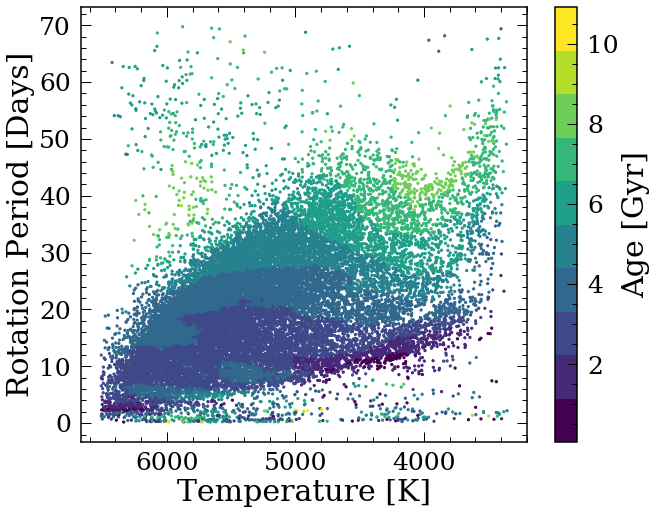

In [50]:
df_bin_MS=pd.read_pickle('NewData/ProtVP_MS_150_w015_bin.pkl')
df_bin_MS=df_bin_MS.loc[df_bin_MS['age_STD']>0]

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['Prot'],c=df_bin_MS['age_STD'],cmap=cm,s=5)
plt.gca().invert_xaxis()
plt.xlabel('Temperature [K]')
plt.ylabel('Rotation Period [Days]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')

In [11]:
list(df_bin_MS.columns)

['KID',
 'Teff',
 'logg_x',
 'Mass',
 'Prot',
 'Prot_err',
 'LPH',
 'w',
 'DC',
 'solution_id',
 'designation',
 'source_id',
 'random_index',
 'gaia_ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'fra

In [19]:
"""
Fstar=df_bin_MS.loc[df_bin_MS['teff_calc']>6000]
Fstar=Fstar.loc[Fstar['teff_calc']<7600]

Gstar=df_bin_MS.loc[df_bin_MS['teff_calc']>5300]
Gstar=Gstar.loc[Gstar['teff_calc']<6000]

Kstar=df_bin_MS.loc[df_bin_MS['teff_calc']>3900]
Kstar=Kstar.loc[Kstar['teff_calc']<5200]

Mstar=df_bin_MS.loc[df_bin_MS['teff_calc']<3600]
"""
Fstar=df_bin_MS.loc[df_bin_MS['teff_calc']>6200]
Fstar=Fstar.loc[Fstar['teff_calc']<6300]

Gstar=df_bin_MS.loc[df_bin_MS['teff_calc']>5700]
Gstar=Gstar.loc[Gstar['teff_calc']<5750]

Kstar=df_bin_MS.loc[df_bin_MS['teff_calc']>4000]
Kstar=Kstar.loc[Kstar['teff_calc']<4100]

Mstar=df_bin_MS.loc[df_bin_MS['teff_calc']<3500]


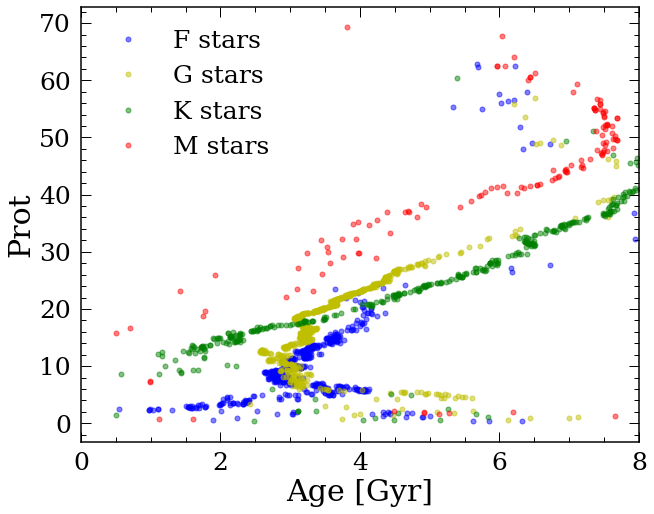

In [20]:
ploty='Prot'
plt.figure(figsize=(10,8))
#plt.errorbar(Fstar['age_STD'],Fstar['Prot'],yerr=Fstar['Prot_err'],xerr=Fstar['age_STD_err'],fmt='ro')
plt.plot(Fstar['age_STD'],Fstar[ploty],'bo',markersize=5,label='F stars',alpha=0.5)
plt.plot(Gstar['age_STD'],Gstar[ploty],'yo',markersize=5,label='G stars',alpha=0.5)
plt.plot(Kstar['age_STD'],Kstar[ploty],'go',markersize=5,label='K stars',alpha=0.5)
plt.plot(Mstar['age_STD'],Mstar[ploty],'ro',markersize=5,label='M stars',alpha=0.5)
plt.xlim([0,8])
#plt.ylim([5,200])
plt.xlabel('Age [Gyr]')
#plt.ylabel('Rotation Period [Days]')
plt.ylabel(ploty)
plt.legend()

"\nplt.subplot(1,2,2)\ncm = plt.cm.get_cmap('viridis',15)\nplt.scatter(df_bin_MS_inv['dv_STD'],df_bin_MS_inv['Prot'],c=df_bin_MS_inv['teff_calc'],cmap=cm)\n#plt.xlim([0,8])\nplt.xlabel('Velocity Dispersion [km/s]')\nplt.ylabel('Rotation Period [Days]')\ncb=plt.colorbar()\ncb.set_label('Temperature [K]')\nplt.ylim([0,60])\nplt.tight_layout()\n"

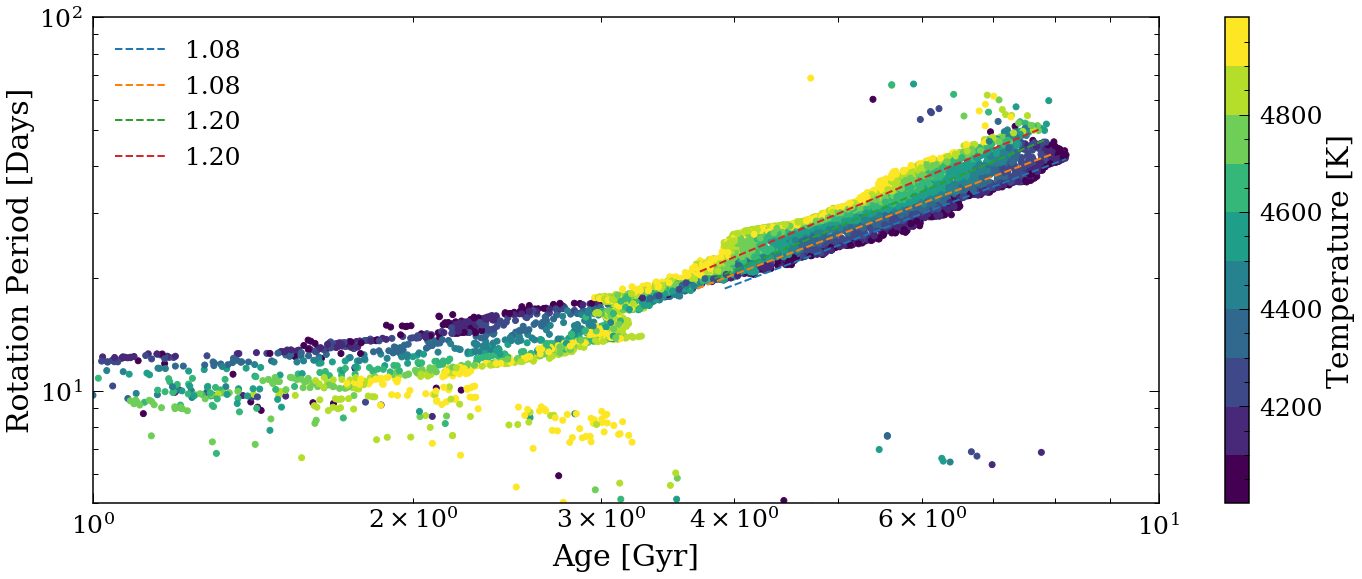

In [39]:
plt_temp_min=4000
plt_temp_max=5000

df_bin_MS_inv=df_bin_MS.loc[df_bin_MS['teff_calc']>plt_temp_min]
df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['teff_calc']<plt_temp_max]

#df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>0]
#df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']<50]


#plt.figure(figsize=(20,8))
#plt.subplot(1,2,1)
plt.figure(figsize=(20,8))
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(df_bin_MS_inv['age_STD'],df_bin_MS_inv['Prot'],c=df_bin_MS_inv['teff_calc'],cmap=cm)

agefit=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>20]
agefit=agefit.loc[agefit['Prot']<50]

logage=np.log10(agefit['age_STD'])
logprot=np.log10(agefit['Prot'])
z = np.polyfit(logage, logprot, 1)
model="log(Prot) = %.2f*log(age)+%.2f"%(z[0],z[1])
p = np.poly1d(z)


spacing=200
for i in range(int((plt_temp_max-plt_temp_min)/spacing)-1):
    agefit=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>20]
    agefit=agefit.loc[agefit['Prot']<50]
    
    agefit=agefit.loc[agefit['teff_calc']>plt_temp_min+spacing*i]
    agefit=agefit.loc[agefit['teff_calc']<plt_temp_min+spacing*(i+1)]

    if len(agefit)==0:
        continue
    
    logage=np.log10(agefit['age_STD'])
    logprot=np.log10(agefit['Prot'])
    z = np.polyfit(logage, logprot, 1)
    model="log(Prot) = %.2f*log(age)+%.2f"%(z[0],z[1])
    p = np.poly1d(z)

    plt.plot(np.power(10,sorted(logage)),np.power(10,p(sorted(logage))),'--',label="%.2f"%(z[0]),linewidth=2)


    
plt.xlabel('Age [Gyr]')
plt.ylabel('Rotation Period [Days]')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.xlim([1,10])
plt.ylim([5,100])
"""
plt.subplot(1,2,2)
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS_inv['dv_STD'],df_bin_MS_inv['Prot'],c=df_bin_MS_inv['teff_calc'],cmap=cm)
#plt.xlim([0,8])
plt.xlabel('Velocity Dispersion [km/s]')
plt.ylabel('Rotation Period [Days]')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.ylim([0,60])
plt.tight_layout()
"""

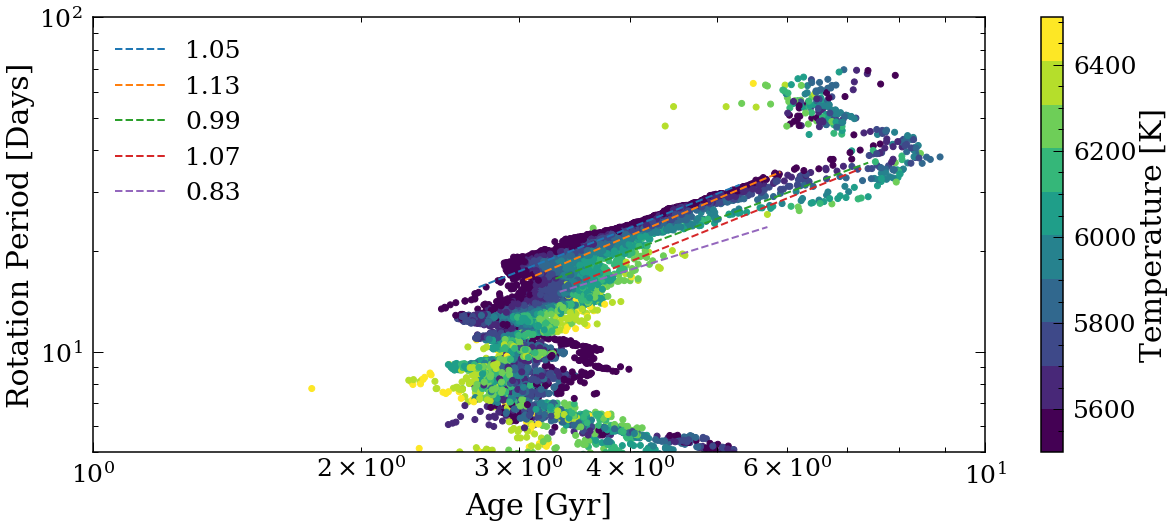

In [34]:
plt_temp_min=5500
plt_temp_max=7000

df_bin_MS_inv=df_bin_MS.loc[df_bin_MS['teff_calc']>plt_temp_min]
df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['teff_calc']<plt_temp_max]

#df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>10]
#df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']<50]

plt.figure(figsize=(20,8))
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(df_bin_MS_inv['age_STD'],df_bin_MS_inv['Prot'],c=df_bin_MS_inv['teff_calc'],cmap=cm)

spacing=200
for i in range(int((plt_temp_max-plt_temp_min)/spacing)-1):
    agefit=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>15]
    agefit=agefit.loc[agefit['Prot']<30]
    
    agefit=agefit.loc[agefit['teff_calc']>plt_temp_min+spacing*i]
    agefit=agefit.loc[agefit['teff_calc']<plt_temp_min+spacing*(i+1)]

    if len(agefit)==0:
        continue
    
    logage=np.log10(agefit['age_STD'])
    logprot=np.log10(agefit['Prot'])
    z = np.polyfit(logage, logprot, 1)
    model="log(Prot) = %.2f*log(age)+%.2f"%(z[0],z[1])
    p = np.poly1d(z)

    plt.plot(np.power(10,sorted(logage)),np.power(10,p(sorted(logage))),'--',label="%.2f"%(z[0]),linewidth=2)


plt.xlim([0,8])
plt.xlabel('Age [Gyr]')
plt.ylabel('Rotation Period [Days]')
plt.yscale('log')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.xlim([1,10])
plt.ylim([5,100])
plt.legend()
#plt.title(model,fontsize=25)


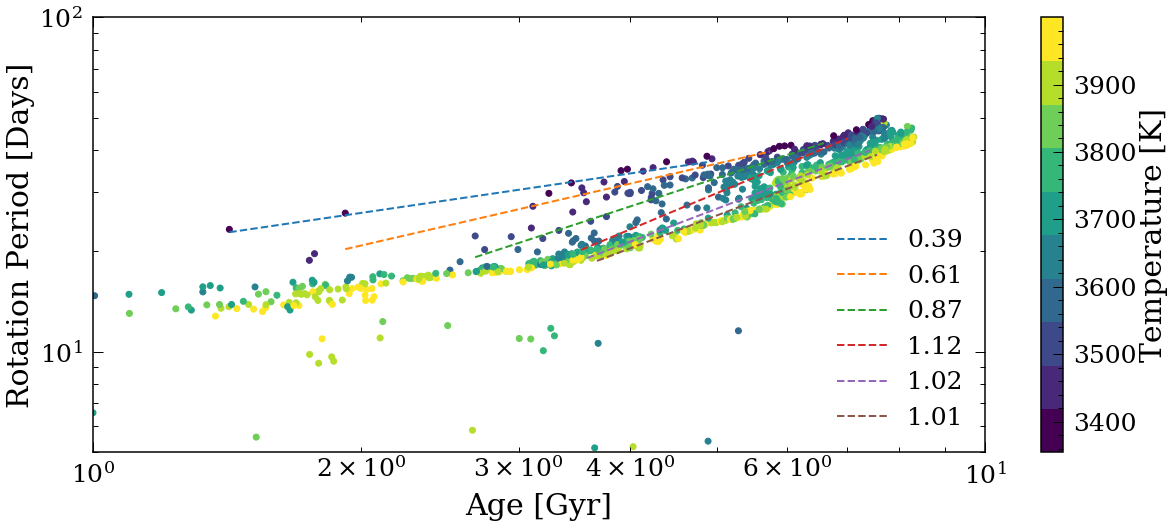

In [35]:
plt_temp_min=3000
plt_temp_max=4000

df_bin_MS_inv=df_bin_MS.loc[df_bin_MS['teff_calc']>plt_temp_min]
df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['teff_calc']<plt_temp_max]

df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>0]
df_bin_MS_inv=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']<50]

plt.figure(figsize=(20,8))
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(df_bin_MS_inv['age_STD'],df_bin_MS_inv['Prot'],c=df_bin_MS_inv['teff_calc'],cmap=cm)

spacing=100
for i in range(int((plt_temp_max-plt_temp_min)/spacing)-1):
    agefit=df_bin_MS_inv.loc[df_bin_MS_inv['Prot']>20]
    agefit=agefit.loc[agefit['Prot']<40]
    
    agefit=agefit.loc[agefit['teff_calc']>plt_temp_min+spacing*i]
    agefit=agefit.loc[agefit['teff_calc']<plt_temp_min+spacing*(i+1)]

    if len(agefit)==0:
        continue
    
    logage=np.log10(agefit['age_STD'])
    logprot=np.log10(agefit['Prot'])
    z = np.polyfit(logage, logprot, 1)
    model="log(Prot) = %.2f*log(age)+%.2f"%(z[0],z[1])
    p = np.poly1d(z)

    plt.plot(np.power(10,sorted(logage)),np.power(10,p(sorted(logage))),'--',label="%.2f"%(z[0]),linewidth=2)

plt.xlabel('Age [Gyr]')
plt.ylabel('Rotation Period [Days]')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1,10])
plt.ylim([5,100])
plt.legend()



# For Rvar

In [4]:
df_Rvar_bin=pd.read_pickle('NewData/RvarVP_MS_150_w015_bin.pkl')


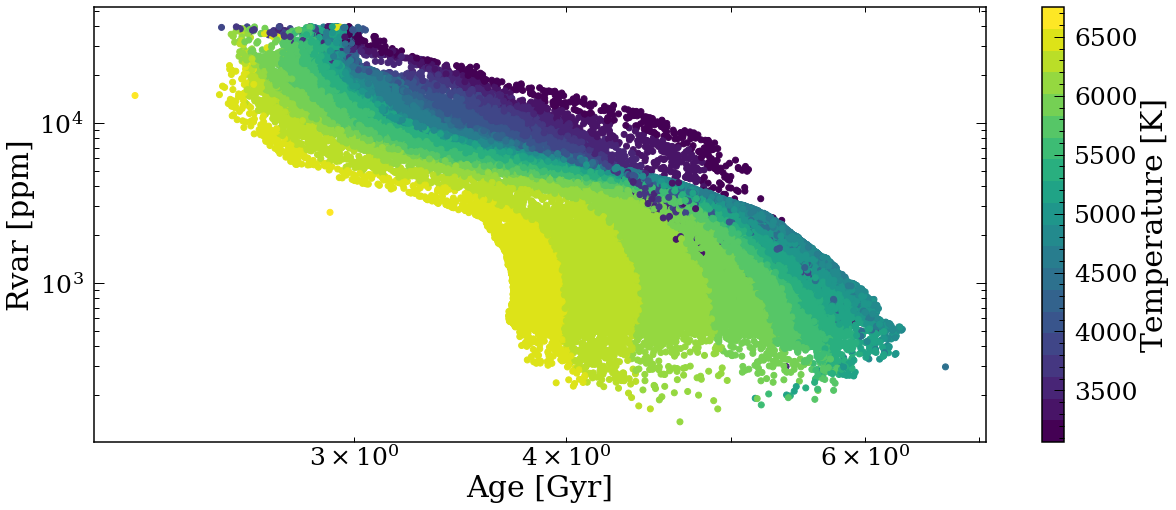

In [8]:
plt.figure(figsize=(20,8))
cm = plt.cm.get_cmap('viridis',20)
plt.scatter(df_Rvar_bin['age'],df_Rvar_bin['Rvar'],c=df_Rvar_bin['teff_calc'],cmap=cm)
plt.xlabel('Age [Gyr]')
plt.ylabel('Rvar [ppm]')
plt.yscale('log')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Temperature [K]')

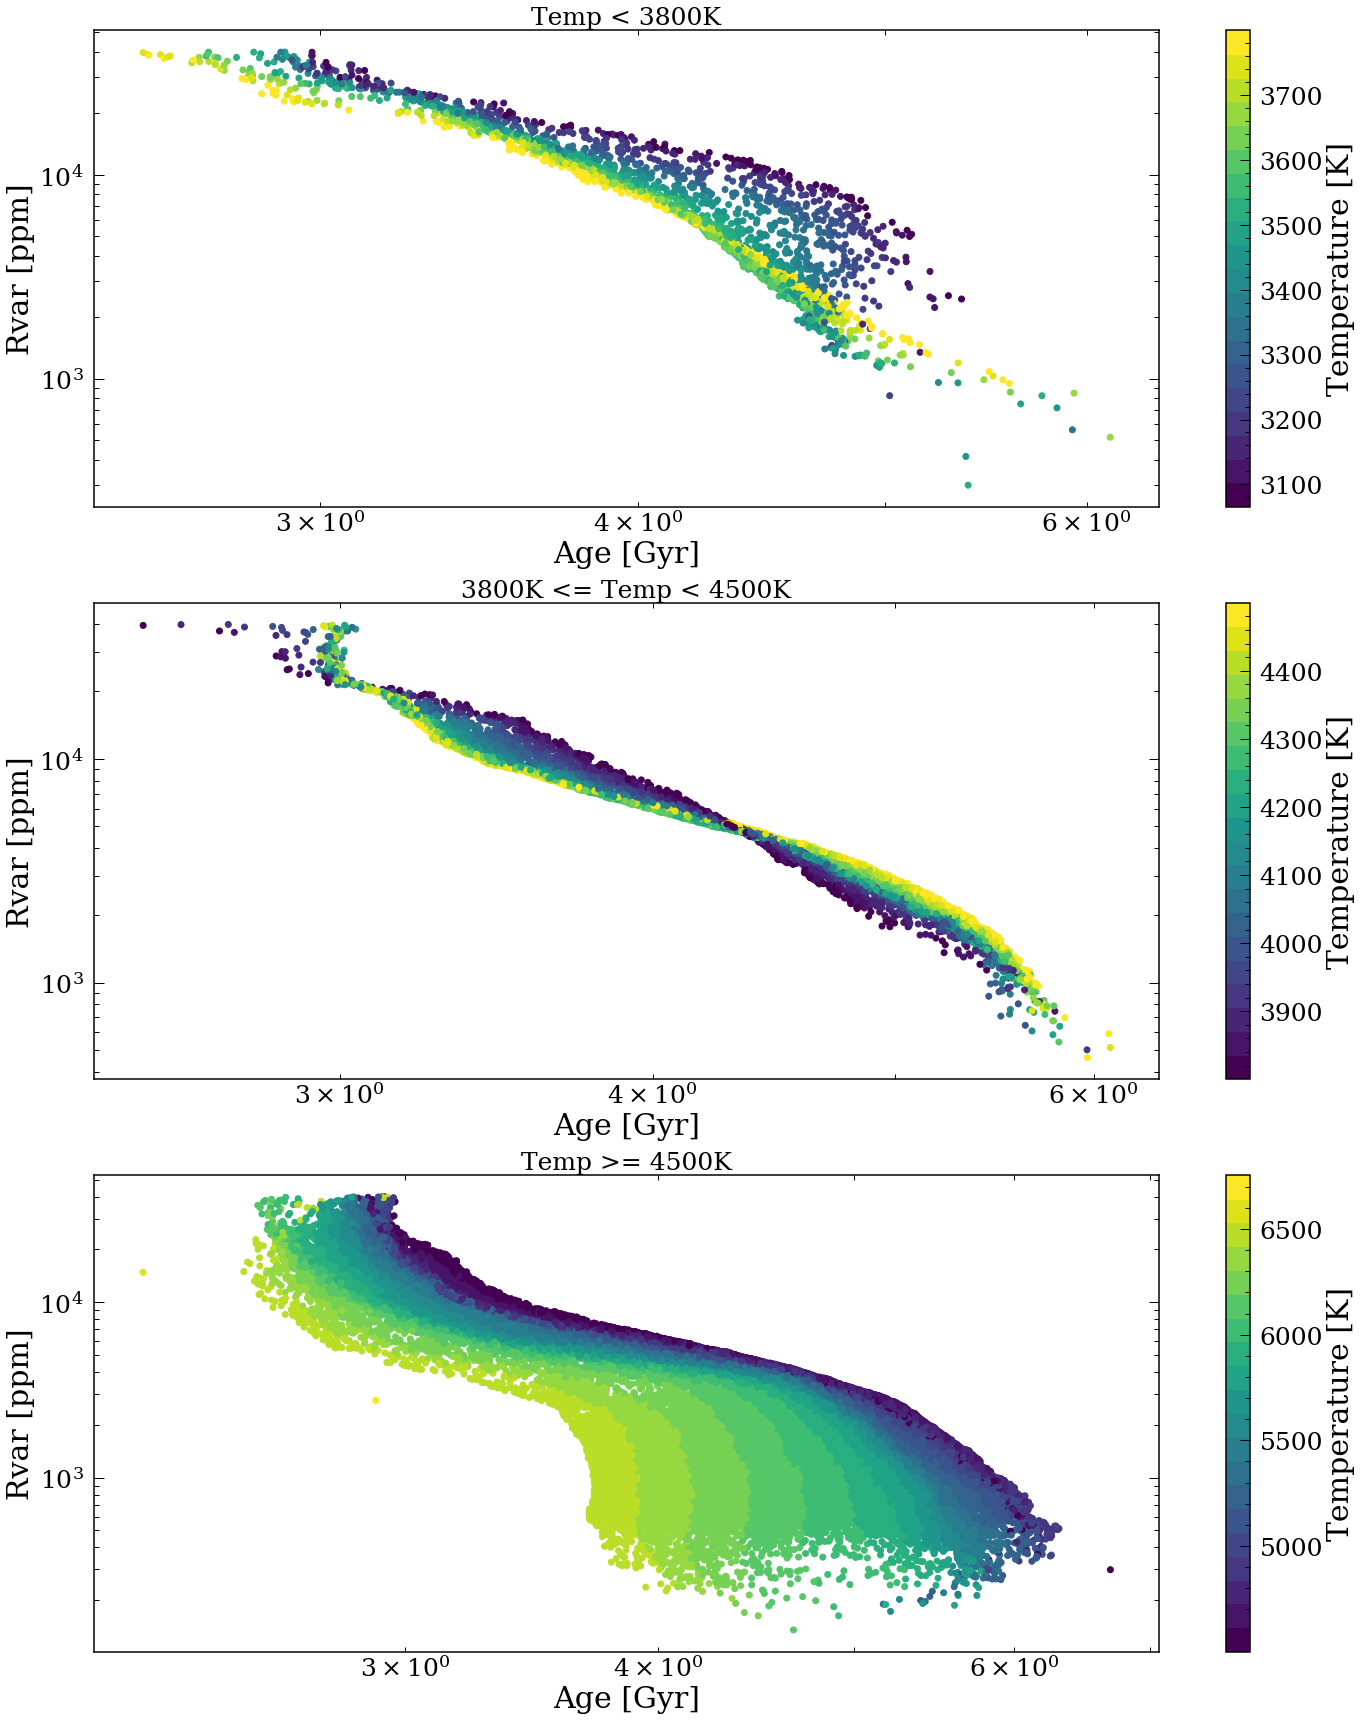

In [17]:
# stars < 4000 k
tempcut_low=3800
tempcut_med=4500

lowtemps=df_Rvar_bin.loc[df_Rvar_bin['teff_calc']<tempcut_low]
medtemps=df_Rvar_bin.loc[df_Rvar_bin['teff_calc']>=tempcut_low]
medtemps=medtemps.loc[medtemps['teff_calc']<tempcut_med]
hitemps=df_Rvar_bin.loc[df_Rvar_bin['teff_calc']>=tempcut_med]

plt.figure(figsize=(20,24))
cm = plt.cm.get_cmap('viridis',20)
plt.subplot(3,1,1)
plt.scatter(lowtemps['age'],lowtemps['Rvar'],c=lowtemps['teff_calc'],cmap=cm)
plt.xlabel('Age [Gyr]')
plt.ylabel('Rvar [ppm]')
plt.yscale('log')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.title('Temp < '+str(tempcut_low)+'K',fontsize=25)

plt.subplot(3,1,2)
plt.scatter(medtemps['age'],medtemps['Rvar'],c=medtemps['teff_calc'],cmap=cm)
plt.xlabel('Age [Gyr]')
plt.ylabel('Rvar [ppm]')
plt.yscale('log')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.title(str(tempcut_low)+'K'+' <= Temp < '+str(tempcut_med)+'K',fontsize=25)

plt.subplot(3,1,3)
plt.scatter(hitemps['age'],hitemps['Rvar'],c=hitemps['teff_calc'],cmap=cm)
plt.xlabel('Age [Gyr]')
plt.ylabel('Rvar [ppm]')
plt.yscale('log')
plt.xscale('log')
cb=plt.colorbar()
cb.set_label('Temperature [K]')
plt.title('Temp >= '+str(tempcut_med)+'K',fontsize=25)

plt.tight_layout()
plt.savefig('Rvarovertime.png')